In [1]:
##Required libraries

In [1]:
import pandas as pd                                    ##data reading and data frame
import numpy as np                                     ##arrays,calculations
import seaborn as sns                                  ##data visualization
import sklearn                                         ##model fitting
from sklearn.preprocessing import StandardScaler       ##scaling function
from sklearn.model_selection import train_test_split   ## Data splitng
from sklearn import svm   
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier as dtc  ##tree algorithm
from matplotlib import rcParams                         ##figure size
from sklearn.tree import plot_tree                      ##tree diagram

# Data set

In [3]:
dataset=pd.read_csv("D:/loan_sanction_train.csv")
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN,0.570909
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,NaN,NaN,NaN
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,NaN,NaN,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,NaN,NaN,NaN
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,NaN,NaN,NaN
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,NaN,NaN,NaN
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,NaN,NaN,NaN
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,NaN,NaN,NaN


# EDA

In [2]:
##dropping unnecessary columns

In [4]:
ds=dataset.drop(['Loan_ID','Unnamed: 13','Unnamed: 14','Unnamed: 15'],axis=1)
ds

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
##Correlation
ds.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

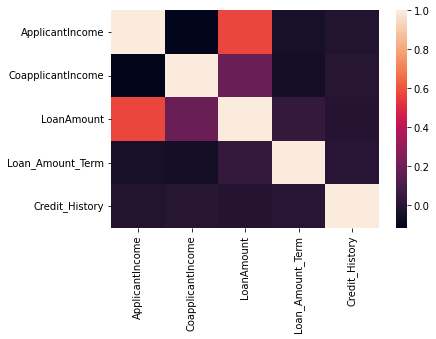

In [6]:
##Correlation Plot
sns.heatmap(ds.corr())

Basic information

Data description

In [7]:
ds.info()
ds.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
ds.isnull().sum()     #finding null values


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3]:
"""
filling null values using measures of central tendency
1.if column contains continuous values use 'mean'
2.if column contains categorical  values use 'mode'
3.if column contains outliers use 'median'
"""

"\nfilling null values using measures of central tendency\n1.if column contains continuous values use 'mean'\n2.if column contains categorical  values use 'mode'\n3.if column contains outliers use 'median'\n"

In [9]:
ds['Gender'].fillna(ds['Gender'].mode()[0],inplace=True)
ds['Married'].fillna(ds['Married'].mode()[0],inplace=True)
ds['Dependents'].fillna(ds['Dependents'].mode()[0],inplace=True)
ds['Self_Employed'].fillna(ds['Self_Employed'].mode()[0],inplace=True)
ds['Credit_History'].fillna(ds['Credit_History'].mode()[0],inplace=True)
ds['Loan_Amount_Term'].fillna(ds['Loan_Amount_Term'].mode()[0],inplace=True)

meanVal=ds['LoanAmount'].mean()
ds['LoanAmount'].fillna(value=meanVal, inplace=True)

In [10]:
ds

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [11]:
ds.dtypes  #data type

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
ds.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [1]:
##conversion of categorical columns into binary data

In [13]:
ds.Loan_Status.replace(('Y','N'),(1,0),inplace=True)
ds.Gender.replace(('Male','Female'),(1,0),inplace=True)
ds.Married.replace(('Yes','No'),(1,0),inplace=True)
ds.Education.replace(('Graduate','Not Graduate'),(1,0),inplace=True)
ds.Self_Employed.replace(('Yes','No'),(1,0),inplace=True)
ds.Property_Area.replace(('Urban','Rural','Semiurban'),(0,1,2),inplace=True)
ds.Dependents.replace(('3+'),(4),inplace=True)

In [14]:
ds

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1
610,1,1,4,1,0,4106,0.0,40.000000,180.0,1.0,1,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,1


In [15]:
ds.shape  #size of data

(614, 12)

In [16]:
ds.dtypes

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [17]:
df=pd.DataFrame(ds)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1
610,1,1,4,1,0,4106,0.0,40.000000,180.0,1.0,1,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,1


In [18]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
5,1,1,2,1,1,5417,4196.0,267.000000,360.0,1.0,0,1
6,1,1,0,0,0,2333,1516.0,95.000000,360.0,1.0,0,1
7,1,1,4,1,0,3036,2504.0,158.000000,360.0,0.0,2,0
8,1,1,2,1,0,4006,1526.0,168.000000,360.0,1.0,0,1
9,1,1,1,1,0,12841,10968.0,349.000000,360.0,1.0,2,0


In [19]:
X=df.drop(['Loan_Status'],axis=1)
Y=ds.Loan_Status

In [20]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [21]:
print(Y)                 #target variable

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


Splitting the data into train-test

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)

In [23]:
print(X.shape,x_train.shape,x_test.shape)

(614, 11) (491, 11) (123, 11)


# Standardize the data

In [24]:
scaler=StandardScaler()

In [25]:
stadardized_df=scaler.fit_transform(df)

In [26]:
print(stadardized_df)

[[ 0.47234264 -1.37208932 -0.6827291  ...  0.41173269 -1.25029822
   0.67451931]
 [ 0.47234264  0.72881553  0.14245922 ...  0.41173269 -0.06009185
  -1.48253724]
 [ 0.47234264  0.72881553 -0.6827291  ...  0.41173269 -1.25029822
   0.67451931]
 ...
 [ 0.47234264  0.72881553  0.14245922 ...  0.41173269 -1.25029822
   0.67451931]
 [ 0.47234264  0.72881553  0.96764754 ...  0.41173269 -1.25029822
   0.67451931]
 [-2.11710719 -1.37208932 -0.6827291  ... -2.42876026  1.13011452
  -1.48253724]]


In [27]:
scaler.fit(x_train)

StandardScaler()

In [28]:
x_train_standardized=scaler.transform(x_train)

In [29]:
print(x_train_standardized)

[[ 0.46405445  0.73100958  0.94040723 ...  2.12976324  0.41115401
   1.13557451]
 [ 0.46405445 -1.36797114 -0.68258029 ... -4.40128267  0.41115401
  -1.24719081]
 [ 0.46405445  0.73100958  0.12891347 ...  0.26375012 -2.43217864
  -1.24719081]
 ...
 [ 0.46405445  0.73100958  2.56339476 ...  0.26375012  0.41115401
  -0.05580815]
 [-2.15491953 -1.36797114  0.12891347 ...  0.26375012  0.41115401
   1.13557451]
 [ 0.46405445 -1.36797114 -0.68258029 ...  0.26375012  0.41115401
  -0.05580815]]


In [30]:
x_test_standardized=scaler.transform(x_test)

In [31]:
print(x_test_standardized)

[[ 0.46405445  0.73100958  0.12891347 ...  0.26375012  0.41115401
  -0.05580815]
 [-2.15491953  0.73100958 -0.68258029 ...  0.26375012 -2.43217864
   1.13557451]
 [ 0.46405445 -1.36797114 -0.68258029 ...  0.26375012  0.41115401
  -0.05580815]
 ...
 [ 0.46405445  0.73100958  2.56339476 ...  0.26375012  0.41115401
  -1.24719081]
 [ 0.46405445  0.73100958 -0.68258029 ... -2.53526955 -2.43217864
  -0.05580815]
 [ 0.46405445  0.73100958  0.12891347 ...  0.26375012  0.41115401
  -1.24719081]]


In [32]:
print(x_train_standardized.std())

1.0


std=1 i.e 

all the data in similar range

and dosent affect the nature of our dataset

In [33]:
print(x_test_standardized.std())

0.9696529823120829


# Data visualization 

according to above discussion 

In [34]:
## data visualizations 

<AxesSubplot:xlabel='Education', ylabel='count'>

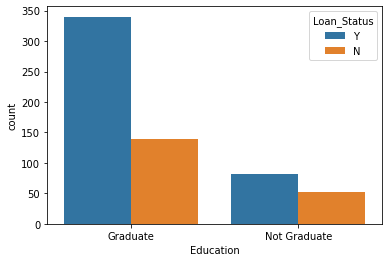

In [35]:
sns.countplot(x='Education',hue='Loan_Status',data=dataset)

In [4]:
'''
Interpretation:
  1.Out of 380 graduates only for 345 graduates loan was approved.
  2.Out of 134 not graduates only for 120 not graduates loan was approved.
  '''

'\nInterpretation:\n  1.Out of 380 graduates only for 345 graduates loan was approved.\n  2.Out of 134 not graduates only for 120 not graduates loan was approved.\n  '

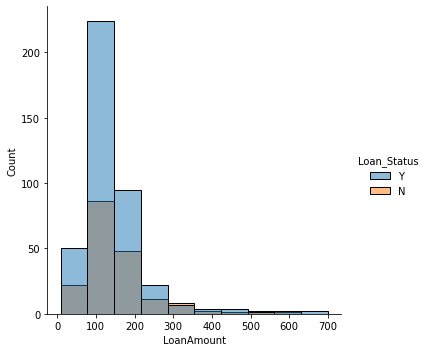

In [36]:
sns.displot(x='LoanAmount',hue='Loan_Status',data=dataset,bins=10)

In [37]:
ds

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1
610,1,1,4,1,0,4106,0.0,40.000000,180.0,1.0,1,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,1


In [38]:
import matplotlib.pyplot as plt

In [39]:
palette_color=sns.color_palette('bright')

In [40]:
keys=['Gender','Married','Dependents','Education','ApplicantIncome','LoanAmount','Credit_History']

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

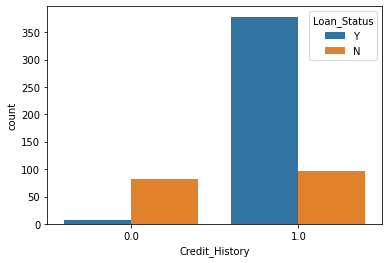

In [41]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=dataset)

In [5]:
'''
Interpretation:
Applicants with good credit history, the loan was approved for 425 out of 525 applicants.
Applicants with bad credit history, the loan was approved for 10 out of 89 applicants.
'''

'\nInterpretation:\nApplicants with good credit history, the loan was approved for 425 out of 525 applicants.\nApplicants with bad credit history, the loan was approved for 10 out of 89 applicants.\n'

In [42]:
x=ds.drop(['Loan_Status'],axis=1)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1
610,1,1,4,1,0,4106,0.0,40.000000,180.0,1.0,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0


In [43]:
y=ds.Loan_Status
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

train-test split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=3)

In [45]:
print(X.shape,x_train.shape,x_test.shape)

(614, 11) (491, 11) (123, 11)


In [46]:
##stratify=to balance 0 and 1 in y
##randomstate=to split data in same way

In [47]:
##LK=Non-kernel, data not projected onto higher dimesions when this kernel is used

# Training of the model

In [ ]:
##required libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd                                     # data processinga
import numpy as np                                      # working with arrays
import matplotlib.pyplot as plt                         # visualization
from matplotlib import rcParams                         # figure size
from termcolor import colored as cl                     # text customization

from sklearn.tree import DecisionTreeClassifier as dtc  # tree algorithm
from sklearn.model_selection import train_test_split    # splitting the data
from sklearn.metrics import accuracy_score              # model precision
from sklearn.tree import plot_tree                      # tree diagram
!pip install category_encoders
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier     #random forest algorithm
from sklearn.model_selection import GridSearchCV        #hyperparameter tuning
from sklearn.metrics import confusion_matrix            #confusion matrix
from sklearn.metrics import classification_report       #classification report
from sklearn import svm                                 #support vector machine
from sklearn.linear_model import LogisticRegression     #logistic regression
from sklearn.metrics import accuracy_score              #accuracy score

ERROR: Could not find a version that satisfies the requirement category_encoders (from versions: none)
ERROR: No matching distribution found for category_encoders


ModuleNotFoundError: No module named 'category_encoders'

# 1. Decision Tree

In [50]:
# Decision Tree
model = dtc(criterion = 'entropy', max_depth = 2)
model.fit(x_train, y_train)

pred_model1 = model.predict(x_train)
print(cl('Accuracy of the decision tree train model is {:.0%}'.format(accuracy_score(y_train, pred_model1)), attrs = ['bold']))
pred_model = model.predict(x_test)
print(cl('Accuracy of the decision tree test model is {:.0%}'.format(accuracy_score(y_test, pred_model)), attrs = ['bold']))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_model)
print('Confusion matrix\n\n', cm)

from sklearn.metrics import classification_report
print(classification_report(y_test, pred_model))

Accuracy of the decision tree train model is 80%
Accuracy of the decision tree test model is 84%
Confusion matrix

 [[18 20]
 [ 0 85]]
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        38
           1       0.81      1.00      0.89        85

    accuracy                           0.84       123
   macro avg       0.90      0.74      0.77       123
weighted avg       0.87      0.84      0.82       123



# 2.Random Forest

In [51]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
y_pred2 = rfc.predict(x_train)
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_train, y_pred2)))
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
grid_search.fit(x_train,y_train)
grid_search.best_estimator_
grid_forest_model = RandomForestClassifier(random_state=1,max_depth=2,n_estimators=101)
grid_forest_model.fit(x_train,y_train)
pred_grid_forest = grid_forest_model.predict(x_test)
score_grid_forest = accuracy_score(pred_grid_forest,y_test)*100
score_grid_forest
pred_grid_forest = grid_forest_model.predict(x_train)
score_grid_forest = accuracy_score(pred_grid_forest,y_train)*100
score_grid_forest
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Model accuracy score with 10 decision-trees : 0.7967
Model accuracy score with 10 decision-trees : 1.0000
Confusion matrix

 [[18 20]
 [ 5 80]]
              precision    recall  f1-score   support

           0       0.78      0.47      0.59        38
           1       0.80      0.94      0.86        85

    accuracy                           0.80       123
   macro avg       0.79      0.71      0.73       123
weighted avg       0.79      0.80      0.78       123



Random forest after hyperparameter tunning

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
grid_search.fit(x_train,y_train)
grid_search.best_estimator_
grid_forest_model = RandomForestClassifier(random_state=1,max_depth=2,n_estimators=101)
grid_forest_model.fit(x_train,y_train)

pred_grid_forest = grid_forest_model.predict(x_test)
score_grid_forest = accuracy_score(pred_grid_forest,y_test)*100
print('Accuracy of Random forest test model',score_grid_forest)

pred_grid_forest = grid_forest_model.predict(x_train)
score_grid_forest2 = accuracy_score(pred_grid_forest,y_train)*100
print('Accuracy of Random forest train model',score_grid_forest2)

Accuracy of Random forest test model 83.73983739837398
Accuracy of Random forest train model 80.24439918533605


In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
   

Confusion matrix

 [[18 20]
 [ 5 80]]
              precision    recall  f1-score   support

           0       0.78      0.47      0.59        38
           1       0.80      0.94      0.86        85

    accuracy                           0.80       123
   macro avg       0.79      0.71      0.73       123
weighted avg       0.79      0.80      0.78       123



# 3.SVM

In [55]:
#Support Vector Machine
from sklearn import svm  
classifier = svm.SVC(kernel='linear')  
classifier 
classifier.fit(x_train,y_train)
x_train_pred=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_pred,y_train)
print('Accuracy of SVM train model',training_data_accuracy)
x_test_pred=classifier.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_pred,y_test)
print('Accuracy of SVM test model',testing_data_accuracy)
cm = confusion_matrix(y_test,x_test_pred)
print('Confusion matrix\n\n', cm)
from sklearn.metrics import classification_report
print(classification_report(y_test,x_test_pred))

Accuracy of SVM train model 0.7780040733197556
Accuracy of SVM test model 0.7967479674796748
Confusion matrix

 [[17 21]
 [ 4 81]]
              precision    recall  f1-score   support

           0       0.81      0.45      0.58        38
           1       0.79      0.95      0.87        85

    accuracy                           0.80       123
   macro avg       0.80      0.70      0.72       123
weighted avg       0.80      0.80      0.78       123



# 4.Logistic Regression

In [56]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred1 = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred1)
print("Accuracy of Logistic regression train model", accuracy)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of logistic regre4ssion test model", accuracy)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of Logistic regression train model 0.8044806517311609
Accuracy of logistic regre4ssion test model 0.8292682926829268
Confusion matrix

 [[18 20]
 [ 1 84]]
              precision    recall  f1-score   support

           0       0.95      0.47      0.63        38
           1       0.81      0.99      0.89        85

    accuracy                           0.83       123
   macro avg       0.88      0.73      0.76       123
weighted avg       0.85      0.83      0.81       123



C:\Users\Shubham Borse\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Prediction System for SVM

In [59]:
input_data=(1,0,0,1,0,5849,0,146,360,1,0)
##changing the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

##reshape the array as we are predictingfor new instance as we are predicting only for one
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

##parameters(1,-1) explains that we are not giving all instances we want only for one new

##standardized the input data
std_data=scaler.transform(input_data_reshape)
print(std_data)

prediction=classifier.predict(std_data)
print(prediction)

if (prediction[0]==1):
    print('Approve Loan')
else:
    print('Not approve loan')



[[ 0.46405445 -1.36797114 -0.68258029  0.51839546 -0.38714713  0.03786469
  -0.53089705 -0.01102647  0.26375012  0.41115401 -1.24719081]]
[1]
Approve Loan


# Prediction System(Logistic Regression)

In [58]:
input_data=(1,0,4,1,0,4166,0,40,180,1,0)
##changing the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

##reshape the array as we are predictingfor new instance as we are predicting only for one
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

##parameters(1,-1) explains that we are not giving all instances we want only for one new

##standardized the input data
std_data=scaler.transform(input_data_reshape)
print(std_data)

prediction=model.predict(std_data)
print(prediction)

if (prediction[0]==1):
    print('Approve Loan')
else:
    print('Not approve loan')


[[ 0.46405445 -1.36797114  2.56339476  0.51839546 -0.38714713 -0.21744184
  -0.53089705 -1.2516026  -2.53526955  0.41115401 -1.24719081]]
[0]
Not approve loan


# Chi square test
Future scope

to check independence of variables

used for Feature selection

In [96]:
from sklearn.feature_selection import chi2 # to check independence of attributes

In [97]:
x=ds.drop('Loan_Status',axis=1)
y=ds['Loan_Status']

In [98]:
chi_scores=chi2(x,y)

In [99]:
chi_scores

(array([3.62343084e-02, 1.78242499e+00, 6.67091154e-03, 9.88390271e-01,
        7.28480330e-03, 9.39049635e+01, 1.13420416e+04, 3.92115449e+01,
        3.77855372e+00, 2.60058772e+01, 4.39885443e+00]),
 array([8.49032435e-01, 1.81851834e-01, 9.34904643e-01, 3.20136125e-01,
        9.31982300e-01, 3.31042936e-22, 0.00000000e+00, 3.80284952e-10,
        5.19135142e-02, 3.40379591e-07, 3.59630802e-02]))

In [100]:
p_values=pd.Series(chi_scores[1],index=x.columns)
p_values.sort_values(ascending=False,inplace=True)

<AxesSubplot:>

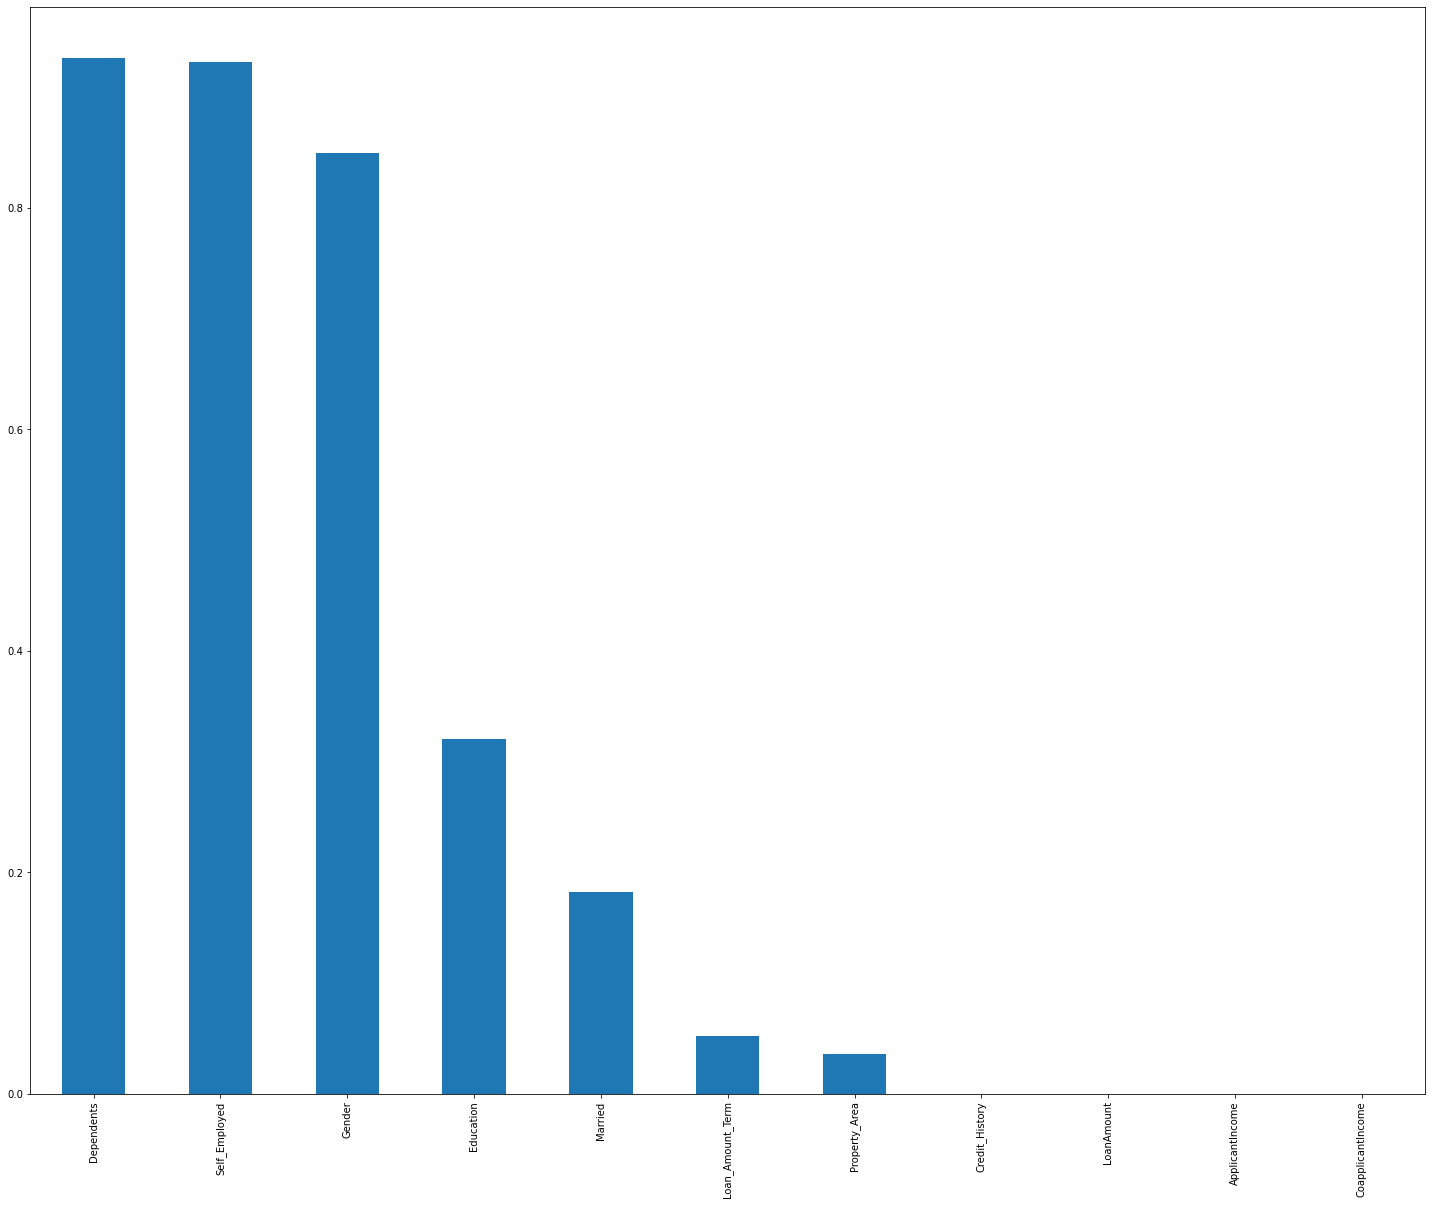

In [101]:
p_values.plot.bar()

Values having higher p-value ara independent of response variable